In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/meteo_18-21.csv')
df["date"] = pd.to_datetime(df["date"])
df.set_index("date",inplace=True)
df.sort_index(inplace=True)
df = df.asfreq('d').fillna(0)
df.drop(columns="Month", inplace=True)
df.head()

,nb,temp,wind,rain
date,,,,
2018-04-10,3062.0,1.23,2.60,0.02
2018-04-11,9599.0,2.60,5.46,0.04
2018-04-12,9611.0,3.22,3.83,0.20
2018-04-13,12738.0,3.97,4.24,0.15
2018-04-14,6854.0,1.32,7.25,1.33


<Figure size 864x576 with 0 Axes>

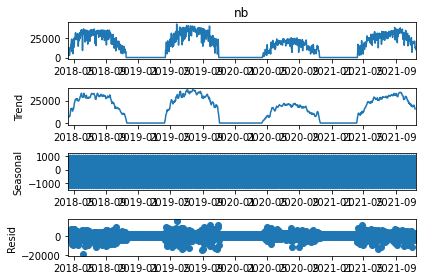

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (12,8))
decompose_data = seasonal_decompose(df["nb"], model="additive")
decompose_data.plot();

<Figure size 864x576 with 0 Axes>

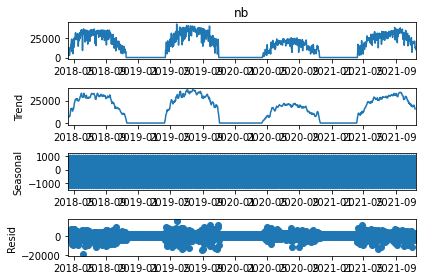

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (12,8))
decompose_data = seasonal_decompose(df["nb"], model="additive")
decompose_data.plot();

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model = ARIMA(df['nb'],order=(1,1,1))
history=model.fit()
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     nb   No. Observations:                 1316
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12825.121
Date:                Thu, 21 Jul 2022   AIC                          25656.242
Time:                        21:16:28   BIC                          25671.787
Sample:                    04-10-2018   HQIC                         25662.071
                         - 11-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2344      0.033      7.139      0.000       0.170       0.299
ma.L1         -0.8005      0.022    -36.863      0.000      -0.843      -0.758
sigma2      1.865e+07   1.35e-10   1.38e+17      0.000    1.87e+07    1.87e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               811.84
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.87e+32. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'original'}, xlabel='date'>

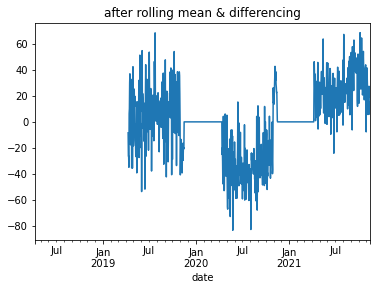

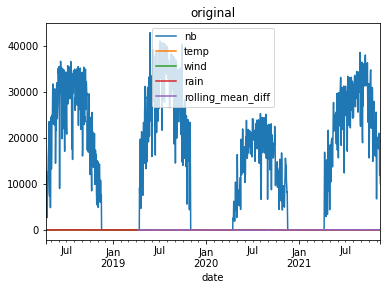

In [18]:
rolling_mean = df["nb"].rolling(window = 365).mean()
df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df.plot(title='original')

<AxesSubplot:xlabel='date'>

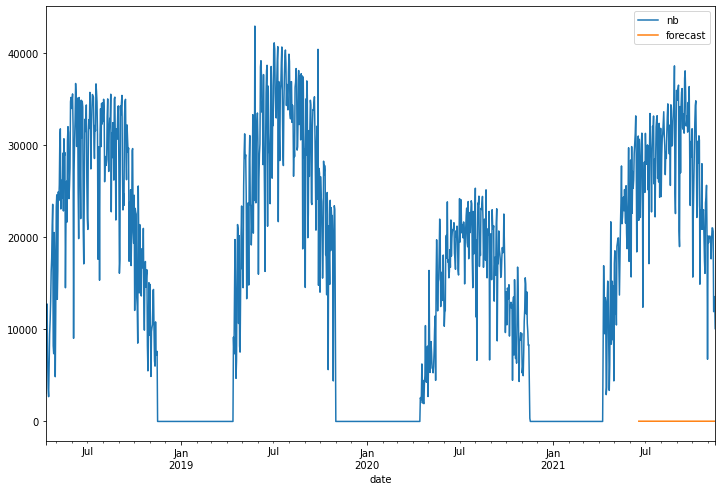

In [19]:
model=ARIMA(df['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()
df['forecast']=model_fit.predict(start=800,end=1000,dynamic=True)
df[['nb','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

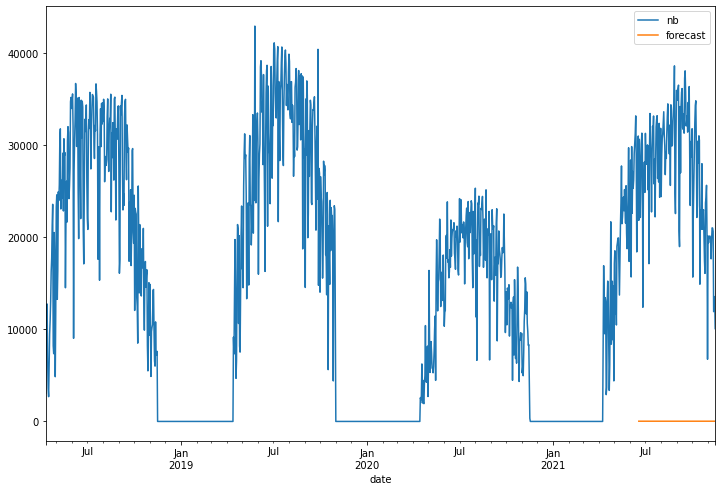

In [20]:
model=ARIMA(df['rolling_mean_diff'].dropna(),order=(1,1,2))
model_fit=model.fit()
df['forecast']=model_fit.predict(start=800,end=1000,dynamic=True)
df[['nb','forecast']].plot(figsize=(12,8))

# SARIMAX

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()